In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housingdf = pd.DataFrame(data=housing.data,columns=housing.feature_names)
housingdf['HousePrice'] = housing.target

In [4]:
housingdf.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [5]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HousePrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
housingdf.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

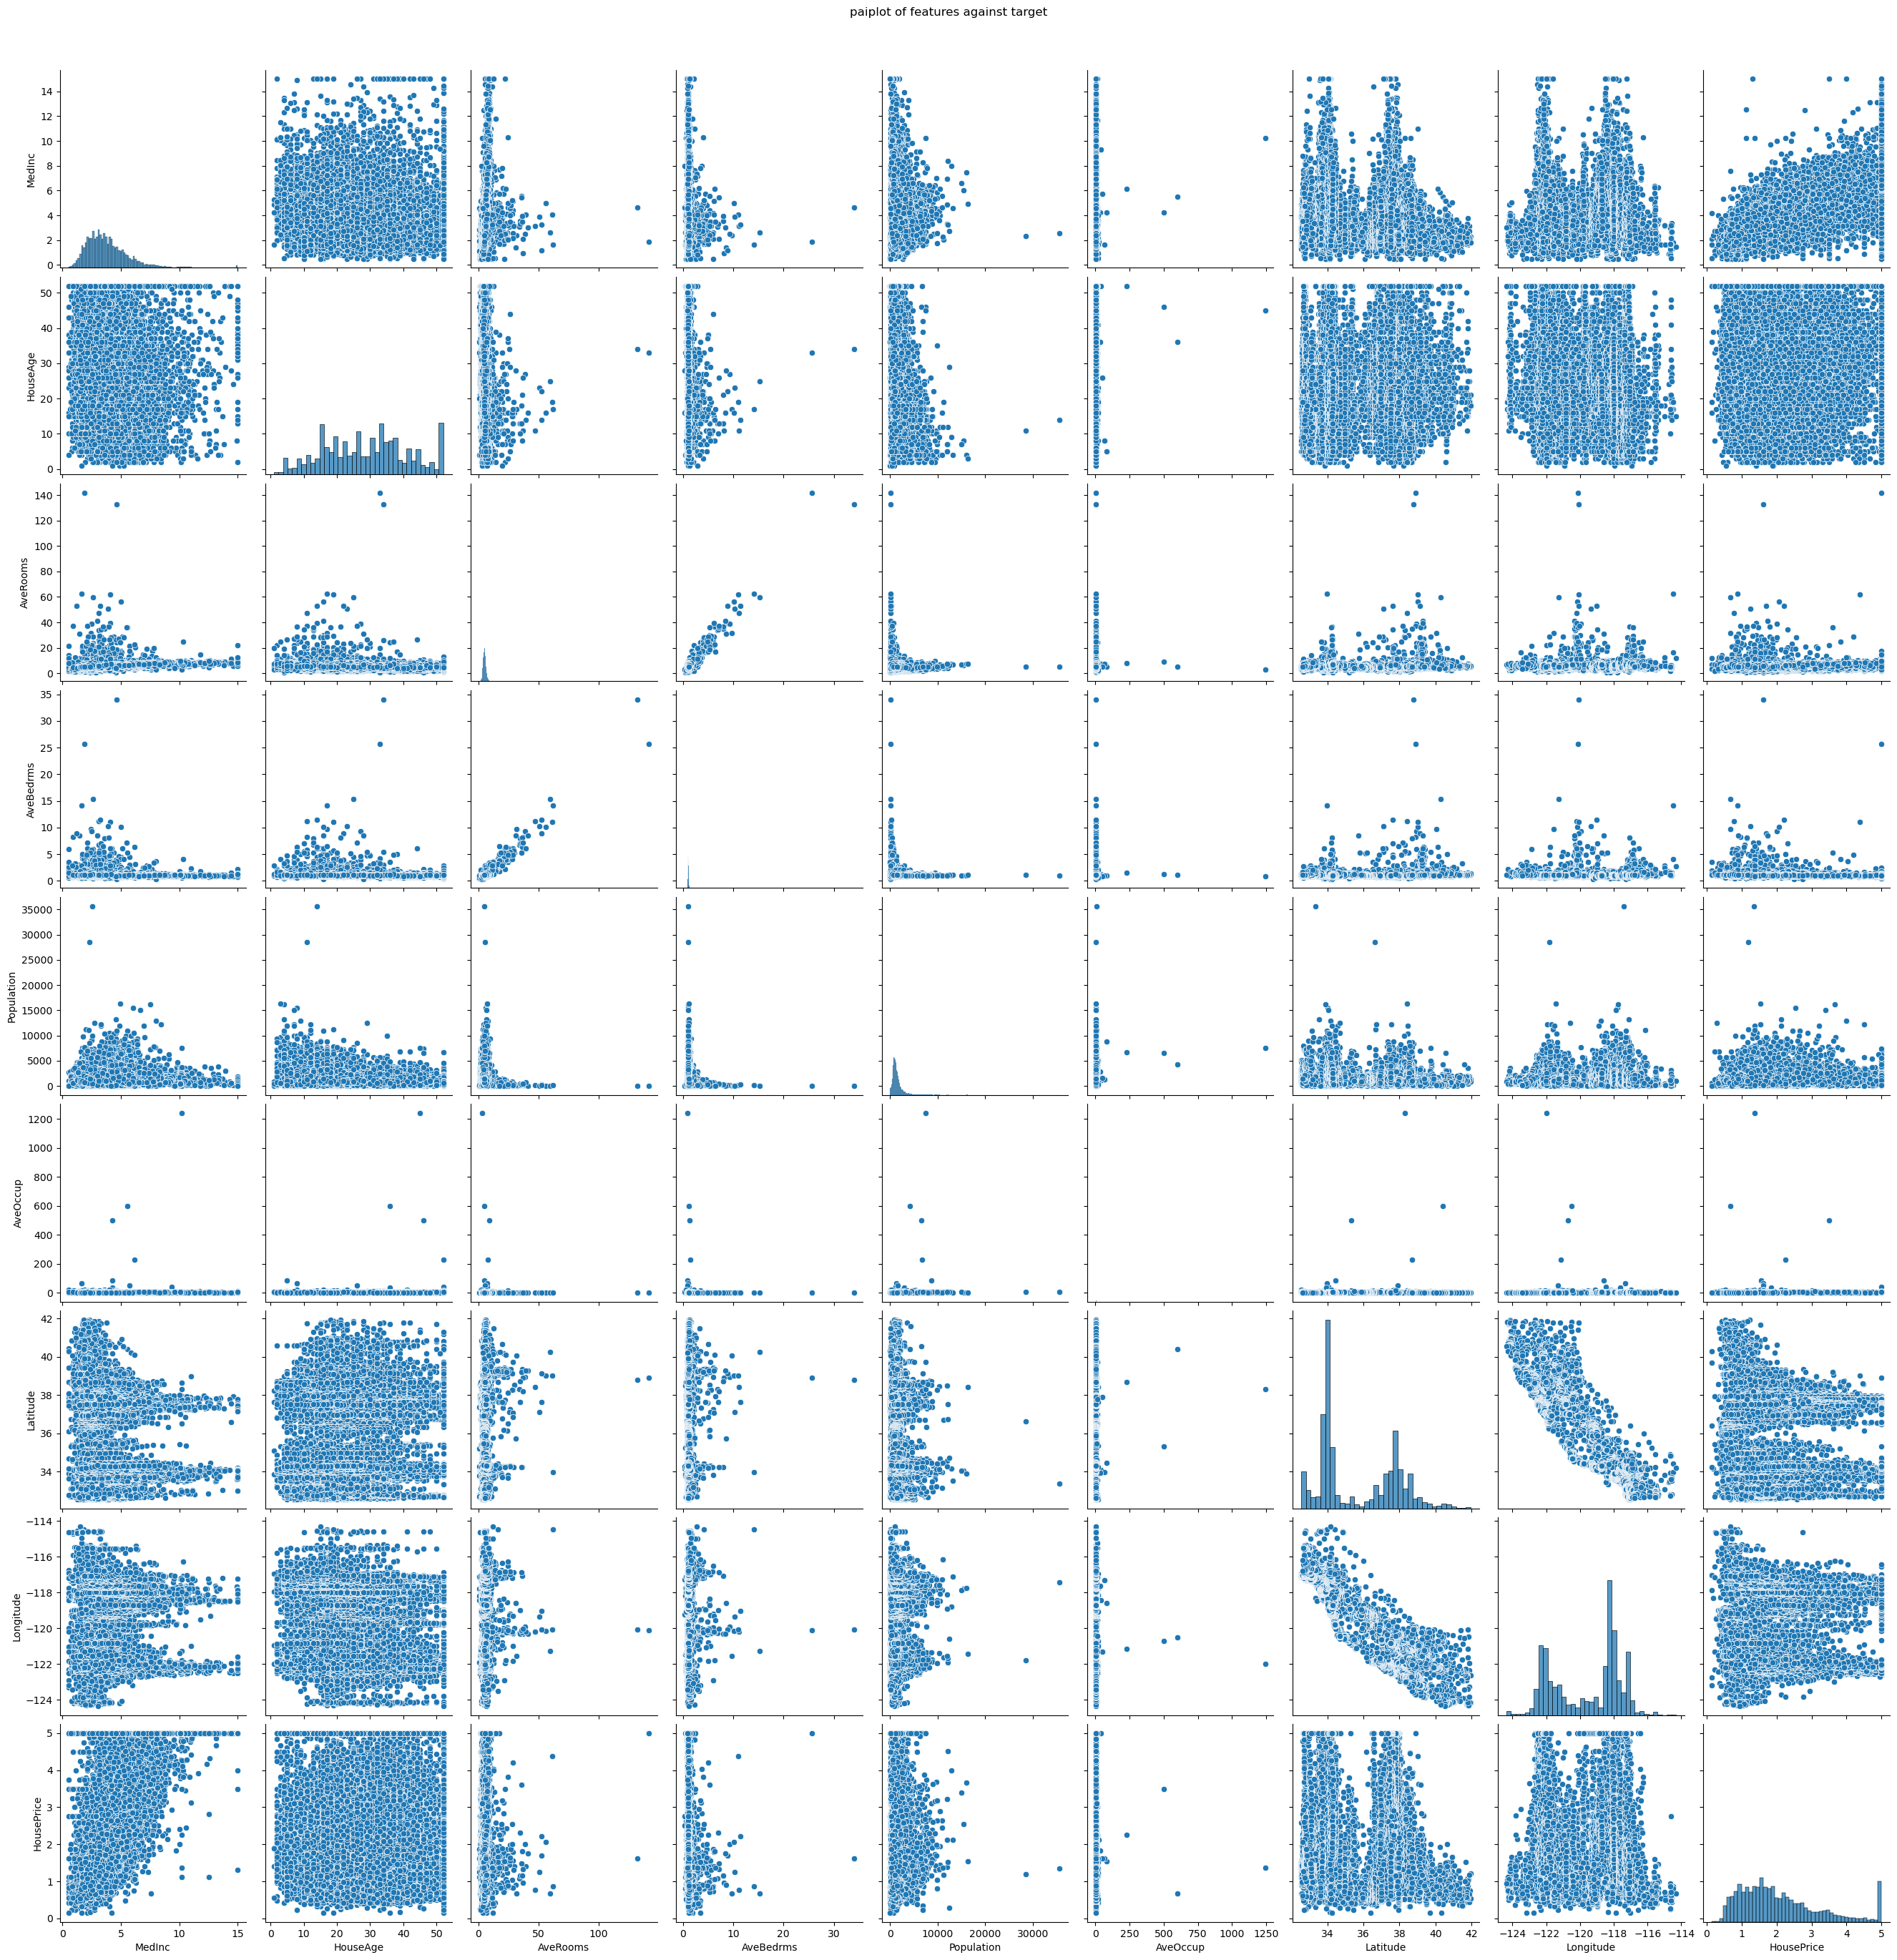

In [7]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(housingdf,height=3)
plt.suptitle("paiplot of features against target", y=1.02)
plt.show()

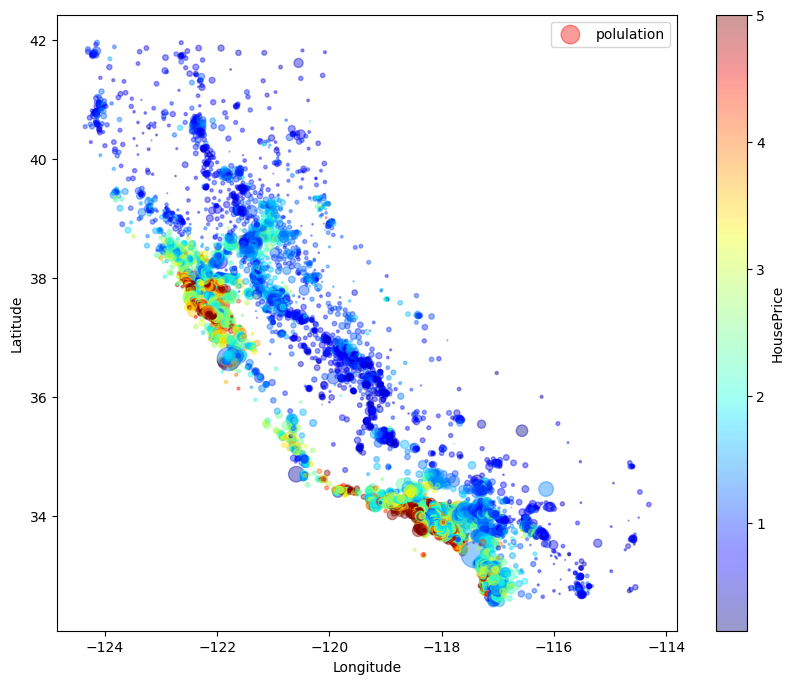

In [8]:
# geographic representation

housingdf.plot(
    kind="scatter",
    x = "Longitude",
    y = "Latitude",
    alpha = 0.4,
    s = housingdf['Population']/100,
    label ="polulation",
    c = "HousePrice",
    cmap = "jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()

<Axes: >

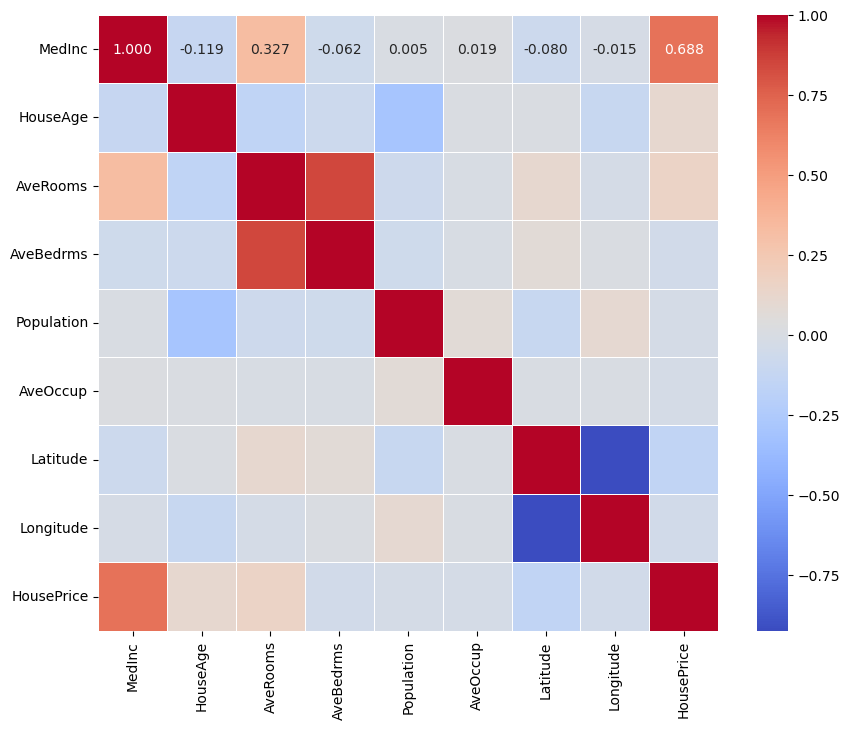

In [9]:
# checking for correlation
corr = housingdf.corr()
plt.figure(figsize=(10,8))


sns.heatmap(data=corr, annot =True, cmap="coolwarm", fmt = ".3f",linewidth=0.5)
# plt.show()

In [10]:
# checking for absolute corr values
corr["HousePrice"].abs().sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

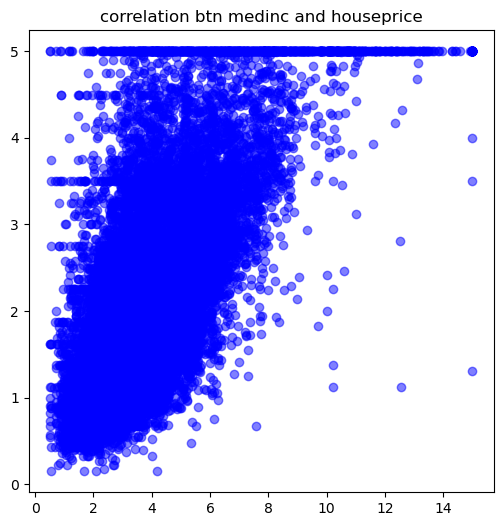

In [11]:
# checking corr btn mdinc and housepeice
medinc = housingdf['MedInc']
houseprice = housingdf['HousePrice']

plt.figure(figsize=(6,6))
plt.scatter(medinc, houseprice,alpha=0.5,color="blue")
plt.title("correlation btn medinc and houseprice")
plt.ylabel="house price"
plt.xlabel = "medinc"
plt.grid=True
plt.show()

In [12]:
# checking for varience infiartion factor//collilinear features
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
housingdf_vif = housingdf.drop("HousePrice",axis=1)
housingdf_vif = housingdf.apply(pd.to_numeric,errors="coerce")

vif_data = pd.DataFrame()
vif_data["features"] = housingdf_vif.columns
vif_data["VIF"] = [variance_inflation_factor(housingdf_vif.values,i) for i in range(len(housingdf_vif.columns))]
print(vif_data)

     features         VIF
0      MedInc   19.624998
1    HouseAge    7.592663
2    AveRooms   47.956351
3   AveBedrms   45.358192
4  Population    2.936078
5    AveOccup    1.099530
6    Latitude  568.497332
7   Longitude  640.064211
8  HousePrice    9.285659


In [14]:
# dropping high variance features
housingdf.drop(['Latitude', 'Longitude'],axis=1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [15]:
col_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',]
housingdf[col_to_convert] = housingdf[col_to_convert].apply(pd.to_numeric,errors= "coerce")

In [16]:
housingdf['HousePrice'] = housingdf['HousePrice'].apply(pd.to_numeric,errors = "coerce")

In [17]:
x = sm.add_constant(housingdf.drop("HousePrice",axis=1))
y = housingdf["HousePrice"]

In [18]:
model = sm.OLS(y,x).fit()

Text(0.5, 1.0, 'Residual distribution')

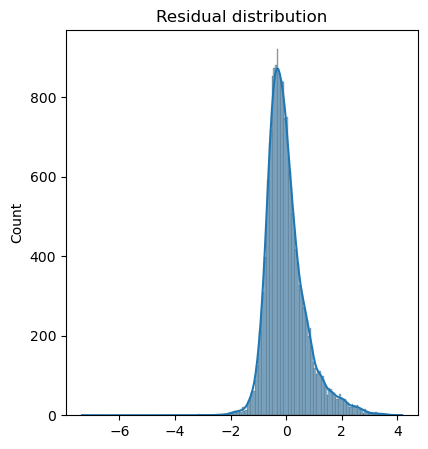

In [19]:
# cal for residuals and visualizing
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals,kde = True)
plt.title("Residual distribution")



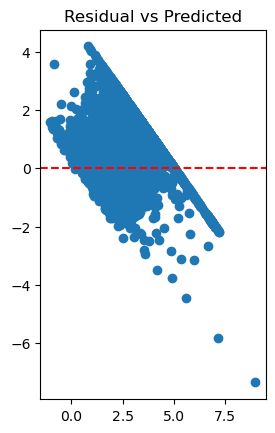

model coefficient:  const        -36.941920
MedInc         0.436693
HouseAge       0.009436
AveRooms      -0.107322
AveBedrms      0.645066
Population    -0.000004
AveOccup      -0.003787
Latitude      -0.421314
Longitude     -0.434514
dtype: float64


In [21]:
plt.subplot(1,2,2)
plt.scatter(model.predict(x),residuals)
plt.axhline(y=0,color="red",linestyle = "--")
plt.title("Residual vs Predicted")
plt.ylabel="Residuals"
plt.show()

print("model coefficient: ",model.params)

In [22]:
# checking the mse errors

from sklearn.metrics import mean_squared_error,r2_score

In [23]:
prediction  = model.predict(x)

print("R squared error: ",r2_score(y,prediction))
print("MSE: ",mean_squared_error(y,prediction))

R squared error:  0.606232685199805
MSE:  0.5243209861846072


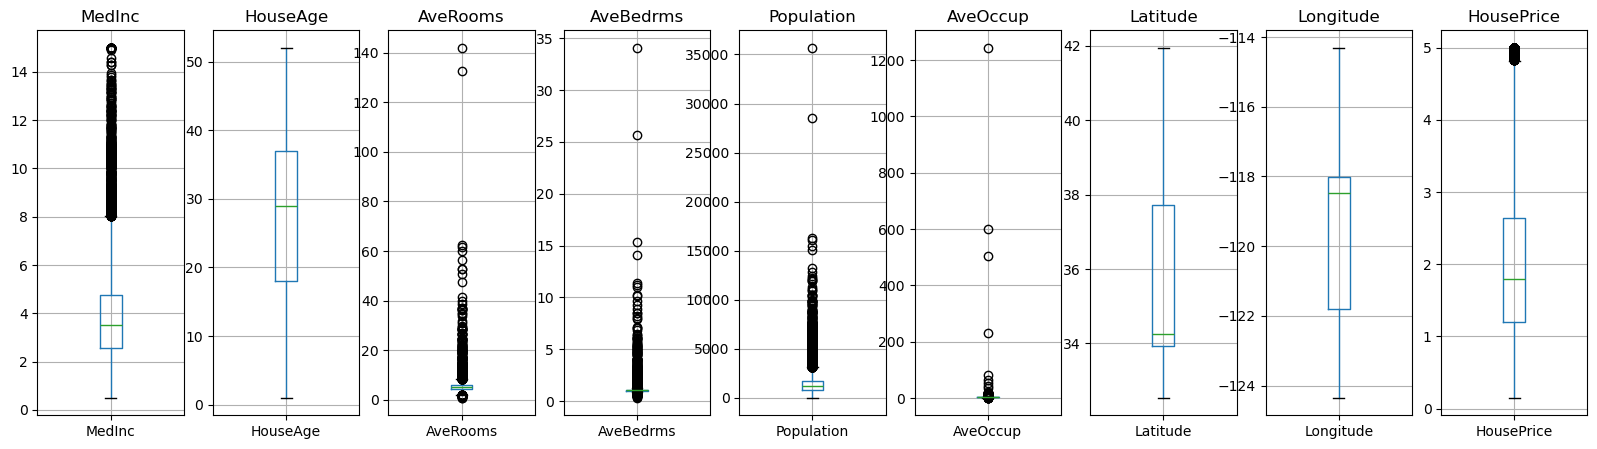

In [23]:
def box_plots(df):
    fig, axes = plt.subplots(1, len(df.columns),figsize=(20,5))
    
    for i,column_name in enumerate(df.columns):
        df.boxplot(column=column_name,ax = axes[i])
        axes[i].set_title(column_name)
    plt.show()
box_plots(housingdf)  

In [24]:
# treating outliers

def remove_outliers(df):
    no_of_outliers = df.copy()
    
    for column_name in df.columns:
        q1 = df[column_name].percentile = 0.25
        q3 = df[column_name].percentile = 0.75
        
    iqr = q1 - q3
    lower_bound = q1 - 1.5 *iqr
    upper_bound = q3 + 1.5 * iqr
    
#     no_of_outliers[column_name] = no_of_outliers[column_name].apply(lambda x:lower_bound if x<lower_bound 
#                                                                    else upper_bound if x>upper_bound 
#                                                                    else x)
    no_of_outliers[column_name] = no_of_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return no_of_outliers

new_housing_df = remove_outliers(housingdf)

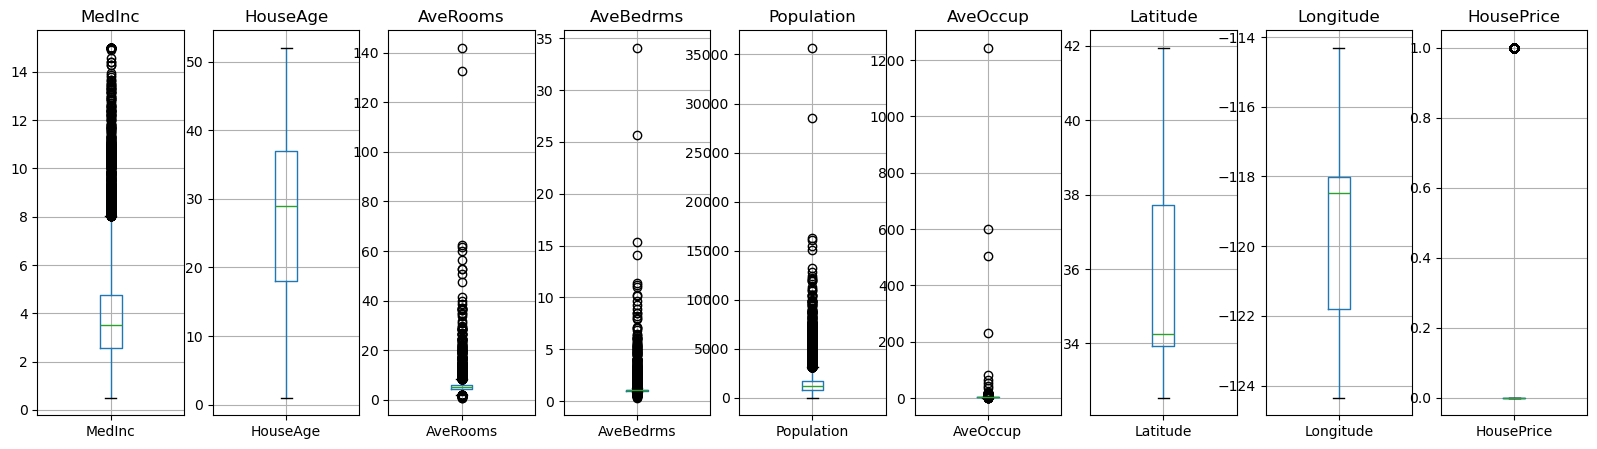

In [25]:
# visualising distribution of predictors
box_plots(new_housing_df)

In [26]:
# fitting the model
col_to_convet =  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',]

new_housing_df[col_to_convert] = new_housing_df[col_to_convert].apply(pd.to_numeric,errors= "coerce")
new_housing_df['HousePrice'] = new_housing_df['HousePrice'].apply(pd.to_numeric,errors = "coerce")

x = sm.add_constant(new_housing_df.drop("HousePrice",axis=1))
y = new_housing_df["HousePrice"]

model = sm.OLS(y,x).fit()

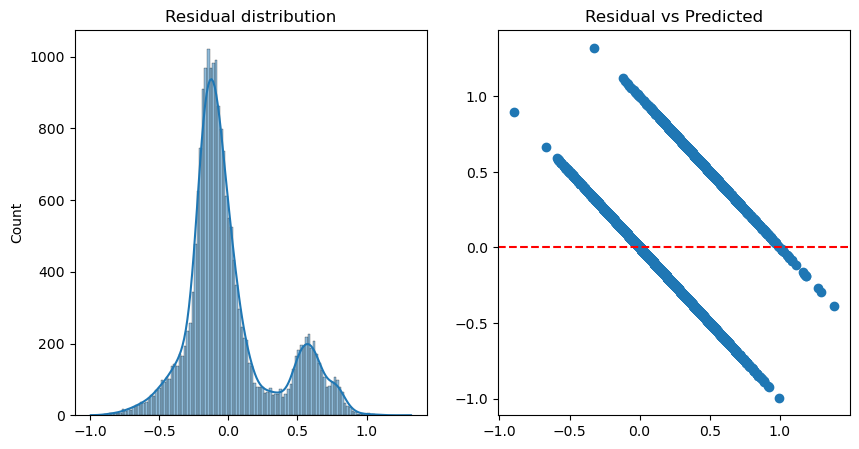

model coefficient:  const         15.264870
MedInc        -0.058809
HouseAge       0.001312
AveRooms       0.007648
AveBedrms     -0.077390
Population    -0.000019
AveOccup       0.000401
Latitude       0.192545
Longitude      0.181422
dtype: float64


In [27]:
# cal for residuals and visualizing
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals,kde = True)
plt.title("Residual distribution")

plt.subplot(1,2,2)
plt.scatter(model.predict(x),residuals)
plt.axhline(y=0,color="red",linestyle = "--")
plt.title("Residual vs Predicted")
plt.show()

print("model coefficient: ",model.params)

In [28]:
prediction  = model.predict(x)

print("R squared error: ",r2_score(y,prediction))
print("MSE: ",mean_squared_error(y,prediction))

R squared error:  0.3049225016119459
MSE:  0.1000011632920091
